In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Data collection

In [2]:
Data_set=pd.read_csv("Mall_Customers.csv")
Data_set

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 2.Split the input data

In [4]:
x=Data_set.iloc[:,3:5].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

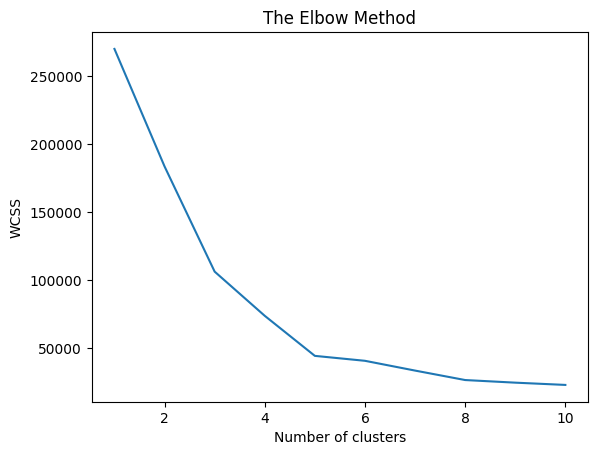

In [10]:
from sklearn.cluster import KMeans
store=[]
for p in range(1,11):
    kmean=KMeans(n_clusters=p,init="k-means++", random_state=42)
    kmean.fit(x)
    store.append(kmean.inertia_)
plt.plot(range(1,11),store)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
#In this digram the data the line have 3 cut ,last cut in the line 8 so no of cluster was 8

In [12]:
store

[269981.28,
 183653.32894736837,
 106348.37306211118,
 73880.64496247197,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518779,
 24766.47160979344,
 23103.122085983916]

### 3. Model creation

In [18]:
from sklearn.cluster import SpectralClustering
sc=SpectralClustering(n_clusters=8, assign_labels='cluster_qr', random_state=42)
y_sc=sc.fit_predict(x)
y_sc

array([2, 4, 1, 4, 2, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 5, 2, 0, 1, 5, 3,
       1, 3, 4, 6, 3, 2, 3, 6, 1, 2, 1, 0, 4, 6, 4, 2, 2, 2, 0, 0, 0, 6,
       2, 6, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 5, 7, 5, 0, 2, 7, 2, 7,
       5, 7, 2, 0, 2, 7, 2, 7, 2, 0, 5, 0, 2, 0, 5, 7, 3, 0, 3, 0, 3, 7,
       3, 0, 6, 7, 6, 7, 5, 7, 6, 0, 3, 5, 7, 6, 3, 0, 1, 5, 1, 6, 1, 6,
       1, 0, 1, 6, 3, 6, 7, 6, 3, 2, 6, 2, 1, 6, 6, 2, 2, 0, 2, 3, 2, 3,
       0, 1])

In [22]:
supervis=Data_set
supervis["cluster_group"]=y_sc
supervis

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


### 4. Final result

C:\Users\smani\anaconda3\envs\Clustering\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


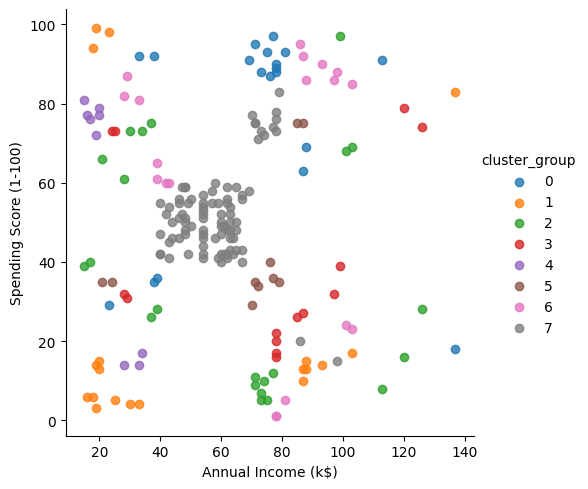

In [24]:
import seaborn as sns
facet=sns.lmplot(data=supervis, x=supervis.columns[3], y=supervis.columns[4],hue=supervis.columns[5], fit_reg=False, legend=True, legend_out=True)

### 5.Evaluation Metric

In [25]:
from sklearn.metrics import silhouette_score
result=silhouette_score(x,y_sc)
result

0.08599388814760883